In [2]:
import pandas as pd
low_memory = False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
filename = r'C:\Users\luks_\OneDrive\Área de Trabalho\Análise de Dados\INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter=';',
                encoding='ISO8859-1',
                error_bad_lines=False)

c:\users\luks_\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
for k in (18,59,61,62,63,103,105,117,119,126,128,129,130,132): print (k, df.columns[k])

18 CS_ETINIA
59 DT_VAC_MAE
61 DT_DOSEUNI
62 DT_1_DOSE
63 DT_2_DOSE
103 FLUASU_OUT
105 FLUBLI_OUT
117 DS_PCR_OUT
119 CLASSI_OUT
126 PAIS_VGM
128 LO_PS_VGM
129 DT_VGM
130 DT_RT_VGM
132 PAC_COCBO


In [5]:
df.shape

(356188, 134)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356188 entries, 0 to 356187
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 298.9+ MB


In [7]:
for par in enumerate(df.columns): print (par)
#Informações do dicionario de dados SRAG

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'DT_SIN_PRI')
(3, 'SEM_PRI')
(4, 'SG_UF_NOT')
(5, 'ID_REGIONA')
(6, 'CO_REGIONA')
(7, 'ID_MUNICIP')
(8, 'CO_MUN_NOT')
(9, 'ID_UNIDADE')
(10, 'CO_UNI_NOT')
(11, 'CS_SEXO')
(12, 'DT_NASC')
(13, 'NU_IDADE_N')
(14, 'TP_IDADE')
(15, 'COD_IDADE')
(16, 'CS_GESTANT')
(17, 'CS_RACA')
(18, 'CS_ETINIA')
(19, 'CS_ESCOL_N')
(20, 'ID_PAIS')
(21, 'CO_PAIS')
(22, 'SG_UF')
(23, 'ID_RG_RESI')
(24, 'CO_RG_RESI')
(25, 'ID_MN_RESI')
(26, 'CO_MUN_RES')
(27, 'CS_ZONA')
(28, 'SURTO_SG')
(29, 'NOSOCOMIAL')
(30, 'AVE_SUINO')
(31, 'FEBRE')
(32, 'TOSSE')
(33, 'GARGANTA')
(34, 'DISPNEIA')
(35, 'DESC_RESP')
(36, 'SATURACAO')
(37, 'DIARREIA')
(38, 'VOMITO')
(39, 'OUTRO_SIN')
(40, 'OUTRO_DES')
(41, 'PUERPERA')
(42, 'CARDIOPATI')
(43, 'HEMATOLOGI')
(44, 'SIND_DOWN')
(45, 'HEPATICA')
(46, 'ASMA')
(47, 'DIABETES')
(48, 'NEUROLOGIC')
(49, 'PNEUMOPATI')
(50, 'IMUNODEPRE')
(51, 'RENAL')
(52, 'OBESIDADE')
(53, 'OBES_IMC')
(54, 'OUT_MORBI')
(55, 'MORB_DESC')
(56, 'VACINA')
(57, 'DT_UT_DOS

In [8]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_evolução = {1: 'Cura',
                  2: 'Óbito',
                  9: 'Ignorado'}
#Troca de código e informação de raça e evolução contida no arquivo.

In [9]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)
#Troca os campos vazios NaN para campo Ignorado nas tabelas

In [43]:
df.sample (10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
126885,11/05/2020,20,27/04/2020,18,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,CENTRO DE ONCOLOGIA LEONARDO DA VINCI,7692595,M,20/09/1935,84,3,3084,6,Ignorado,NaN,NaN,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,11/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,Óbito,11/05/2020,12/05/2020,12/05/2020,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
120594,02/05/2020,18,25/04/2020,17,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,HOSPITAL E PRONTO SOCORRO DR ARISTOTELES PLATA...,5169976,M,19/09/1964,55,3,3055,6,Parda,NaN,3.0,BRASIL,1,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,10/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,Óbito,02/05/2020,11/05/2020,11/05/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146934,17/05/2020,21,12/05/2020,20,SP,GVE XVII CAMPINAS,1342.0,JUNDIAI,352590,HCSVP HOSPITAL SAO VICENTE HOSPITAL DE CAMPANH...,2786435,F,02/07/1977,42,3,3042,9,Branca,NaN,NaN,BRASIL,1,SP,GVE XVII CAMPINAS,1342.0,VARZEA PAULISTA,355650.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,1.0,21/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,Óbito,28/05/2020,29/05/2020,18/05/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
356150,30/06/2020,27,15/06/2020,25,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,15245,M,14/09/1994,25,3,3025,6,Ignorado,NaN,9.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,SAO JOSE DOS PINHAIS,412550.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,30/06/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19132,30/03/2020,14,28/03/2020,13,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL BP,2080575,M,10/06/1972,47,3,3047,6,Ignorado,NaN,NaN,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,9.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,30/03/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,Cura,07/04/2020,09/04/2020,31/03/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
247785,07/06/2020,24,02/06/2020,23,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,UPA PERUS DR LUIZ ANTONIO DE ABREU SAMPAIO DORIA,4050169,M,22/09/1993,26,3,3026,6,Branca,NaN,9.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0,1.0,9.0,9.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,09/06/2020,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264417,11/06/2020,24,04/06/2020,23,RJ,NaN,NaN,RIO DE JANEIRO,330455,SMS HOSPITAL MUNICIPAL ALBERT SCHWEITZER AP 51,2298120,M,13/03/2018,2,3,3002,6,Parda,NaN,9.0,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,NaN,9.0,2.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,Cura,18/06/2020,22/06/2020,12/06/2020,9,NaN,NaN,NaN,NaN,Na

In [11]:
df.groupby('SG_UF_NOT').size().sort_values(ascending=False)
#Números de casos de SRAG nos Estados

SG_UF_NOT
SP    128474
RJ     42351
CE     23003
MG     22253
PE     18115
PR     15049
PA     14501
AM     11748
RS     11620
BA     10772
MT      8691
DF      6077
SC      5361
PI      5130
PB      4782
GO      4645
MA      4533
AL      3671
MS      3274
RN      3224
ES      3002
SE      2025
TO      1521
RO      1085
AC       452
RR       447
AP       382
dtype: int64

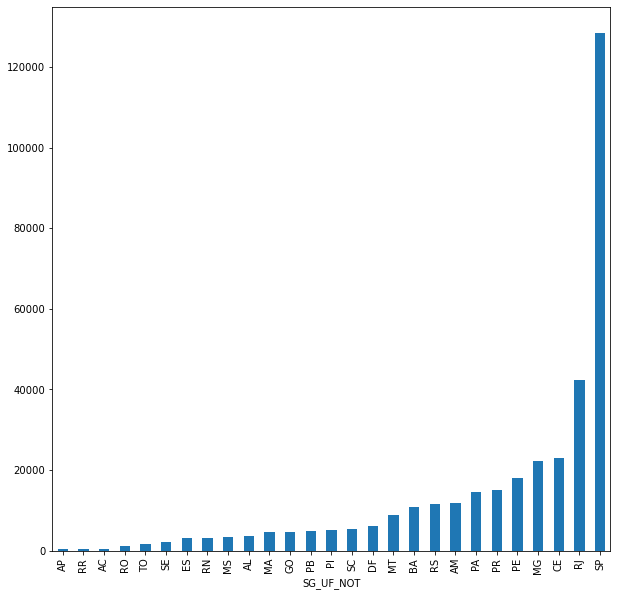

In [12]:
df.groupby('SG_UF_NOT').size().sort_values(ascending=True).plot(kind='bar',figsize=(10,10))
#Análise dos Estados com mais casos de SRAG

In [13]:
df.groupby('EVOLUCAO').size().sort_values(ascending=False)
#Números de evolução dos casos de SRAG

EVOLUCAO
Cura        138626
Ignorado    132348
Óbito        85214
dtype: int64

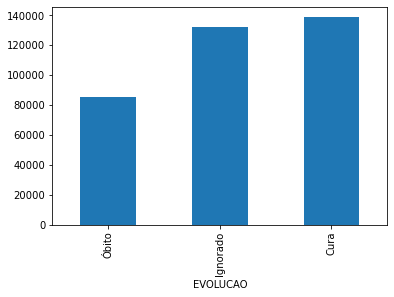

In [14]:
df.groupby('EVOLUCAO').size().sort_values(ascending=True).plot(kind='bar')
#Análise sobre a evolução dos casos de SRAG

In [15]:
df.groupby('CS_RACA').size().sort_values(ascending=False)
#Número de casos de SRAG entre as raças

CS_RACA
Ignorado    114360
Branca      112116
Parda       108838
Preta        16796
Amarela       3123
Indígena       955
dtype: int64

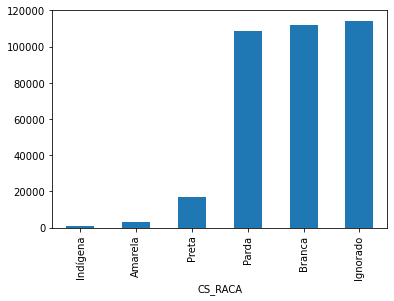

In [16]:
df.groupby('CS_RACA').size().sort_values(ascending=True).plot(kind='bar')
#Análise de casos de SRAG entre as raças. OBS.: muitos postos deixam em branco este campo por conta da urgência do atendimento, por conta disso deixam em branco. 

In [17]:
df.groupby('CS_SEXO').size().sort_values(ascending=False)
#Numero de casos entre o sexo Feminino e Masculino

CS_SEXO
M    194004
F    162059
I       125
dtype: int64

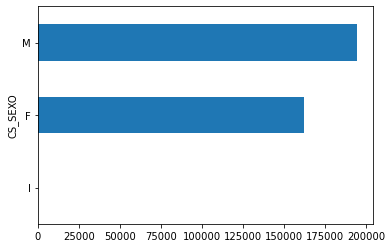

In [18]:
df.groupby('CS_SEXO').size().sort_values(ascending=True).plot(kind='barh')
#Análise com o Sexo. Mais Pessoas do sexo Masculino contrairam a SRAG.

In [19]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()
#Número de casos de SRAG com pessoas maiores que 60 anos

169987

In [20]:
df.query('NU_IDADE_N <= 60 ')['NU_IDADE_N'].count()
#Número de casos de SRAG com pessoas menores que 60 anos

192241

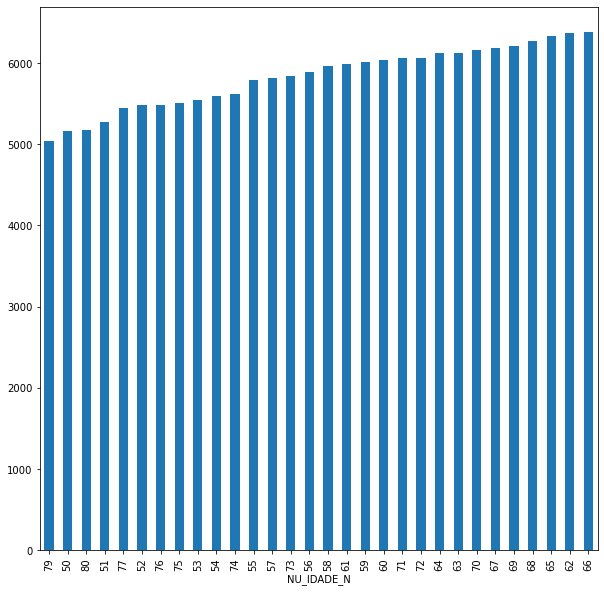

In [32]:
df.groupby('NU_IDADE_N').size().sort_values().tail(30).plot(kind='bar',figsize=(10,10))
#Nesta análise percebemos que o maior número de casos foram com Pessoas com 66 anos de idade.

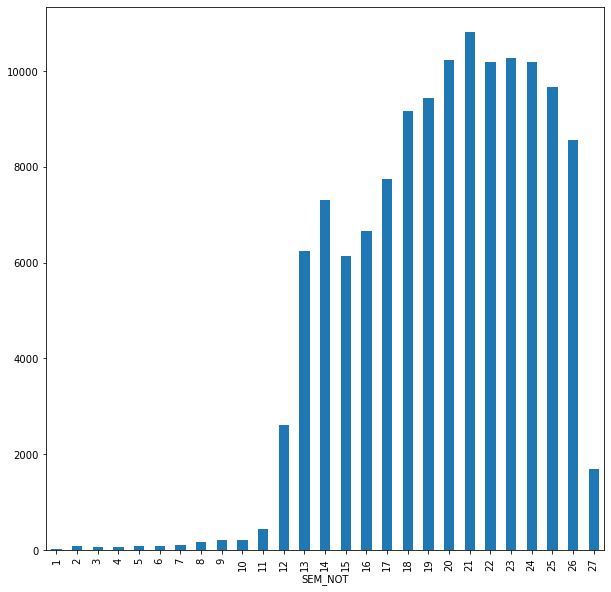

In [22]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind = 'bar',figsize=(10,10))
#Análise de número casos no Estado de São Paulo durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos

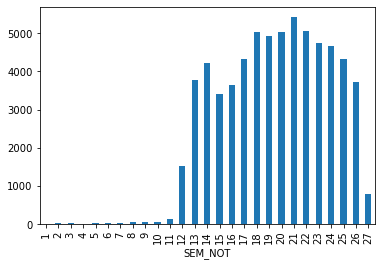

In [38]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')
#Análise de número casos no municipio de São Paulo durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos

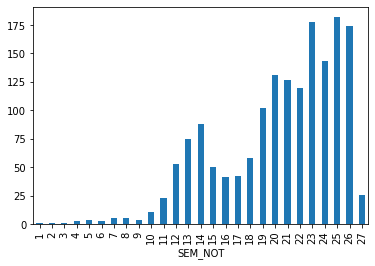

In [33]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')
#Análise de número casos no municipio de São José dos Campos durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos

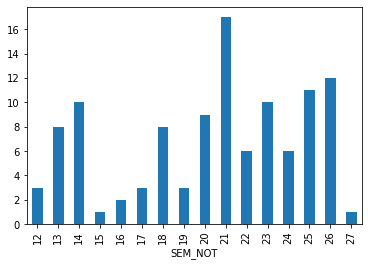

In [25]:
df.query('ID_MUNICIP == "CACAPAVA"').groupby('SEM_NOT').size().plot(kind='bar')
#Análise de número casos no municipio de Caçapava durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos

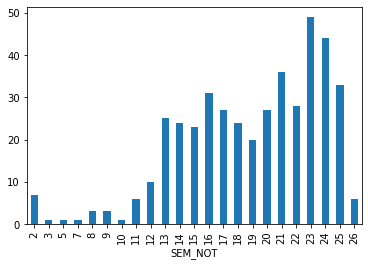

In [26]:
df.query('ID_MUNICIP == "JACAREI"').groupby('SEM_NOT').size().plot(kind='bar')
#Análise de número casos no municipio de Jacareí durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos

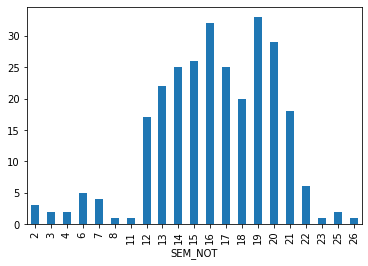

In [37]:
df.query('ID_MUNICIP == "TAUBATE"').groupby('SEM_NOT').size().plot(kind='bar')
#Análise de número casos no municipio de Taubaté durante as semanas de junho/20
#Obs.: A última semana deve ser ignorada, pois o fechamento do arquivo se dá antes da conclusão da semana e por isso os dados estão incompletos